# ME-ViT Plotting

# 32x32

## 1. Latency per mode

[(0.53792417, 0.75090328, 0.56912118), (0.42702625, 0.69711868, 0.56614659), (0.33948744, 0.64143931, 0.56487679), (0.26693801, 0.58118582, 0.56045121), (0.20094292, 0.52087429, 0.55342884), (0.14051521, 0.46268258, 0.54653253), (0.11087217, 0.39917938, 0.53604354), (0.12811691, 0.33411727, 0.51652464), (0.15765823, 0.26326032, 0.48167456)]
[<BarContainer object of 4 artists>, <BarContainer object of 4 artists>, <BarContainer object of 4 artists>, <BarContainer object of 4 artists>, <BarContainer object of 4 artists>, <BarContainer object of 4 artists>] ['LP Mode (Theoretical)', 'LP Mode (HLS)', 'MSA Mode (Theoretical)', 'MSA Mode (HLS)', 'MLP Mode (Theoretical)', 'MLP Mode (HLS)']


/tmp/ipykernel_757642/595837156.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=FONT_SIZE)  # Set the font size of y-axis tick labels
/tmp/ipykernel_757642/595837156.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=FONT_SIZE)  # Set the font size of y-axis tick labels


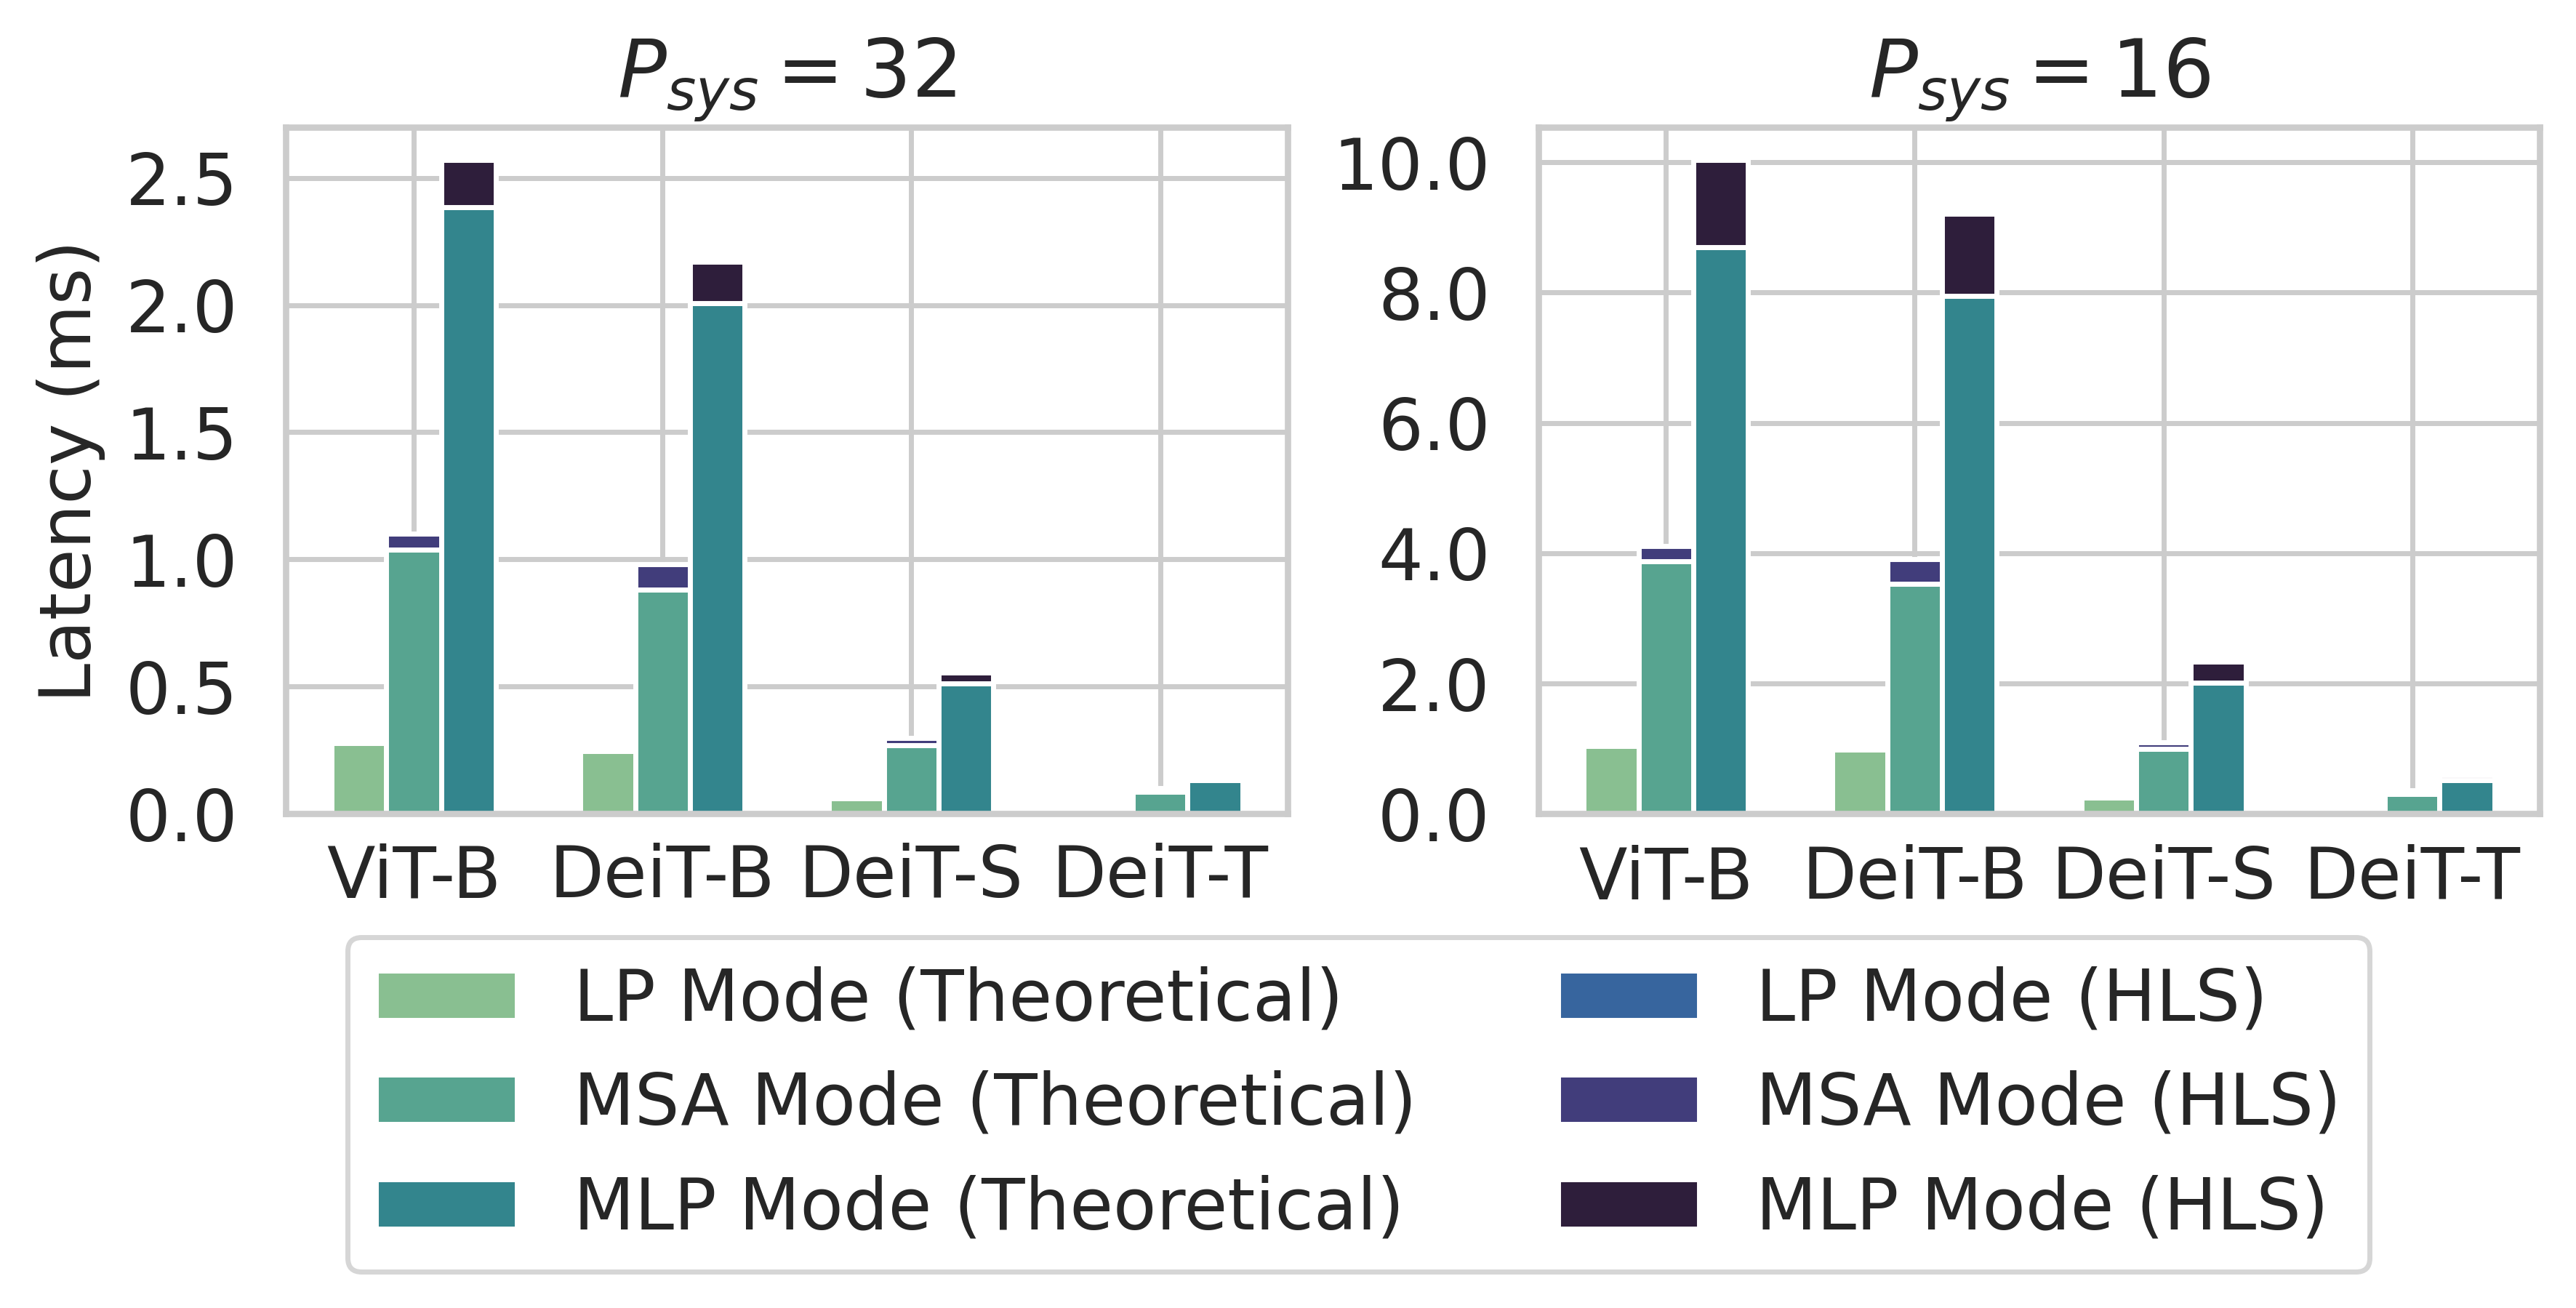

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = np.array([
    [0.2931166667, 1.10208, 2.569536667],
    [0.2607166667, 0.97972, 2.169856667],
    [0.06897666667, 0.2991, 0.5551366667],
    [0.01918666667, 0.10155, 0.1452166667]
])

data_ideal = np.array([
    [0.27648, 1.03716, 2.38592],
    [0.24576, 0.88224, 2.00704],
    [0.06144, 0.2696, 0.512],
    [0.01536, 0.0868, 0.13312]
])
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 2.5),dpi=500)
 
FONT_SIZE=14


sns.set()
sns.set_style("whitegrid")
colors = sns.color_palette("crest",9)
colors2 = sns.color_palette("mako_r",6)


print(colors)


bar_width = 0.22
cluster_positions = np.arange(4)

labels = ["LP Mode (HLS)", "MSA Mode (HLS)", "MLP Mode (HLS)"]
labels_2 = ["LP Mode (Theoretical)", "MSA Mode (Theoretical)", "MLP Mode (Theoretical)"]

for i in range(3):
    bar_positions = cluster_positions + i * bar_width
    ax1.bar(bar_positions, data_ideal[:, i], bar_width, alpha=1, color=colors[2*i], label=labels_2[i])
    ax1.bar(bar_positions, data[:, i]-data_ideal[:, i], bar_width, alpha=1, label=labels[i],color=colors2[i+3],bottom = data_ideal[:, i])

ax1.set_ylabel('Latency (ms)',fontsize=FONT_SIZE)
ax1.set_title('$P_{sys} = 32$', fontsize=16)

ax1.set_xticks(cluster_positions + bar_width)
ax1.set_xticklabels([],fontsize=FONT_SIZE)
tick_labels = ['ViT-B', 'DeiT-B', 'DeiT-S', 'DeiT-T']
ax1.set_yticklabels(ax1.get_yticks(), fontsize=FONT_SIZE)  # Set the font size of y-axis tick labels

smaller_FONT_SIZE = 14

# We'll specify the font size for each x-axis tick label
for i in range(len(tick_labels)):
    if tick_labels[i] == 'ViT-B':
        ax1.text(cluster_positions[i] + bar_width+0., -0.25, tick_labels[i], ha='center', va='center', fontsize=FONT_SIZE)
    else:
        ax1.text(cluster_positions[i] + bar_width+0., -0.25, tick_labels[i], ha='center', va='center', fontsize=FONT_SIZE)

data = np.array([
    [1.103116667, 4.10616, 10.03097667],
    [1.038316667, 3.90772, 9.203456667],
    [0.2734566667, 1.09778, 2.328576667],
    [0.07534666667, 0.36073, 0.5960966667]
])

data_ideal = np.array([
    [1.04448, 3.87464, 8.69376],
    [0.98304, 3.52896, 7.94624],
    [0.24576, 0.98976, 2.00704],
    [0.06144, 0.30672, 0.512]
])     


        
        
for i in range(3):
    bar_positions = cluster_positions + i * bar_width
    ax2.bar(bar_positions, data_ideal[:, i], bar_width, alpha=1, color=colors[2*i], label=labels_2[i])
    ax2.bar(bar_positions, data[:, i]-data_ideal[:, i], bar_width, alpha=1, label=labels[i],color=colors2[i+3],bottom = data_ideal[:, i])

ax2.set_title('$P_{sys} = 16$', fontsize=16)

ax2.set_xticks(cluster_positions + bar_width)
tick_labels = ['ViT-B', 'DeiT-B', 'DeiT-S', 'DeiT-T']
ax2.set_xticklabels([],fontsize=FONT_SIZE)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=FONT_SIZE)  # Set the font size of y-axis tick labels


# We'll specify the font size for each x-axis tick label
for i in range(len(tick_labels)):
    if tick_labels[i] == 'ViT-B':
        ax2.text(cluster_positions[i] + bar_width+0., -1, tick_labels[i], ha='center', va='center', fontsize=FONT_SIZE)
    else:
        ax2.text(cluster_positions[i] + bar_width+0., -1, tick_labels[i], ha='center', va='center', fontsize=FONT_SIZE)


        
handles, labels = ax1.get_legend_handles_labels()
print(handles, labels)

#order = [1, 3, 5, 0, 2, 4]

order = [0, 2, 4, 1, 3, 5]

ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=FONT_SIZE, bbox_to_anchor=(2.08, -0.18),borderaxespad=0., ncol=2) 


# legend = ax1.legend(fontsize=14, bbox_to_anchor=(1.9, -0.15),borderaxespad=0., ncol=2)
plt.subplots_adjust(wspace=0.25)
plt.show()


## 2. Operations per layer

## 3. Memory usage per layer

/tmp/ipykernel_438918/2205507518.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([ 0, 10, 20, 30, 40, 50], fontsize=FONT_SIZE)  # Set the font size of y-axis tick labels


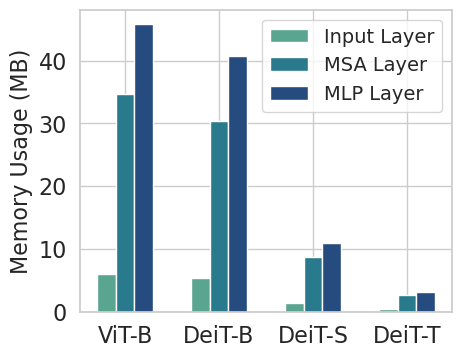

In [20]:
data = np.array([[5.971968,34.644096,45.785088],
        [5.308416,30.401536,40.697856],
        [1.47456,8.720896,10.911744],
        [0.442368,2.746624,3.096576]
])
data=data

fig, ax = plt.subplots(figsize=(4.8, 4),dpi=100)# use 500 in paper

FONT_SIZE=16


sns.set()
sns.set_style("whitegrid")
colors = sns.color_palette("crest")



bar_width = 0.2
cluster_positions = np.arange(4)

labels  = ["Input Layer", "MSA Layer", "MLP Layer"]
#labels_2 = ["LP Mode (Ideal)", "MSA Mode (Ideal)", "MLP Mode (Ideal)"]

for i in range(3):
    bar_positions = cluster_positions + i * bar_width
#    ax.bar(bar_positions, data_ideal[:, i], bar_width, alpha=1, color=colors[2*i], label=labels_2[i])
    ax.bar(bar_positions, data[:, i], bar_width, alpha=1, label=labels[i],color=colors[2*i+1])


#ax.set_xlabel('Breakdown of Latency per ME-ViT Mode')
#ax.set_xlabel('Models',fontsize=FONT_SIZE)
ax.set_ylabel('Memory Usage (MB)',fontsize=FONT_SIZE)


ax.set_xticks(cluster_positions + bar_width,fontsize=FONT_SIZE)
ax.set_xticklabels(['ViT-B', 'DeiT-B', 'DeiT-S', 'DeiT-T'],fontsize=FONT_SIZE)
#ax.set_yticklabels(ax.get_yticks(), fontsize=FONT_SIZE)  # Set the font size of y-axis tick labels
ax.set_yticklabels([ 0, 10, 20, 30, 40, 50], fontsize=FONT_SIZE)  # Set the font size of y-axis tick labels

ax.legend(fontsize=14)
plt.show()


## 4. Bandwidth per mode

/tmp/ipykernel_757642/1929796307.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks().astype('int'), fontsize=FONT_SIZE)  # Set the font size of y-axis tick labels
/tmp/ipykernel_757642/1929796307.py:100: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks().astype('int'), fontsize=FONT_SIZE)


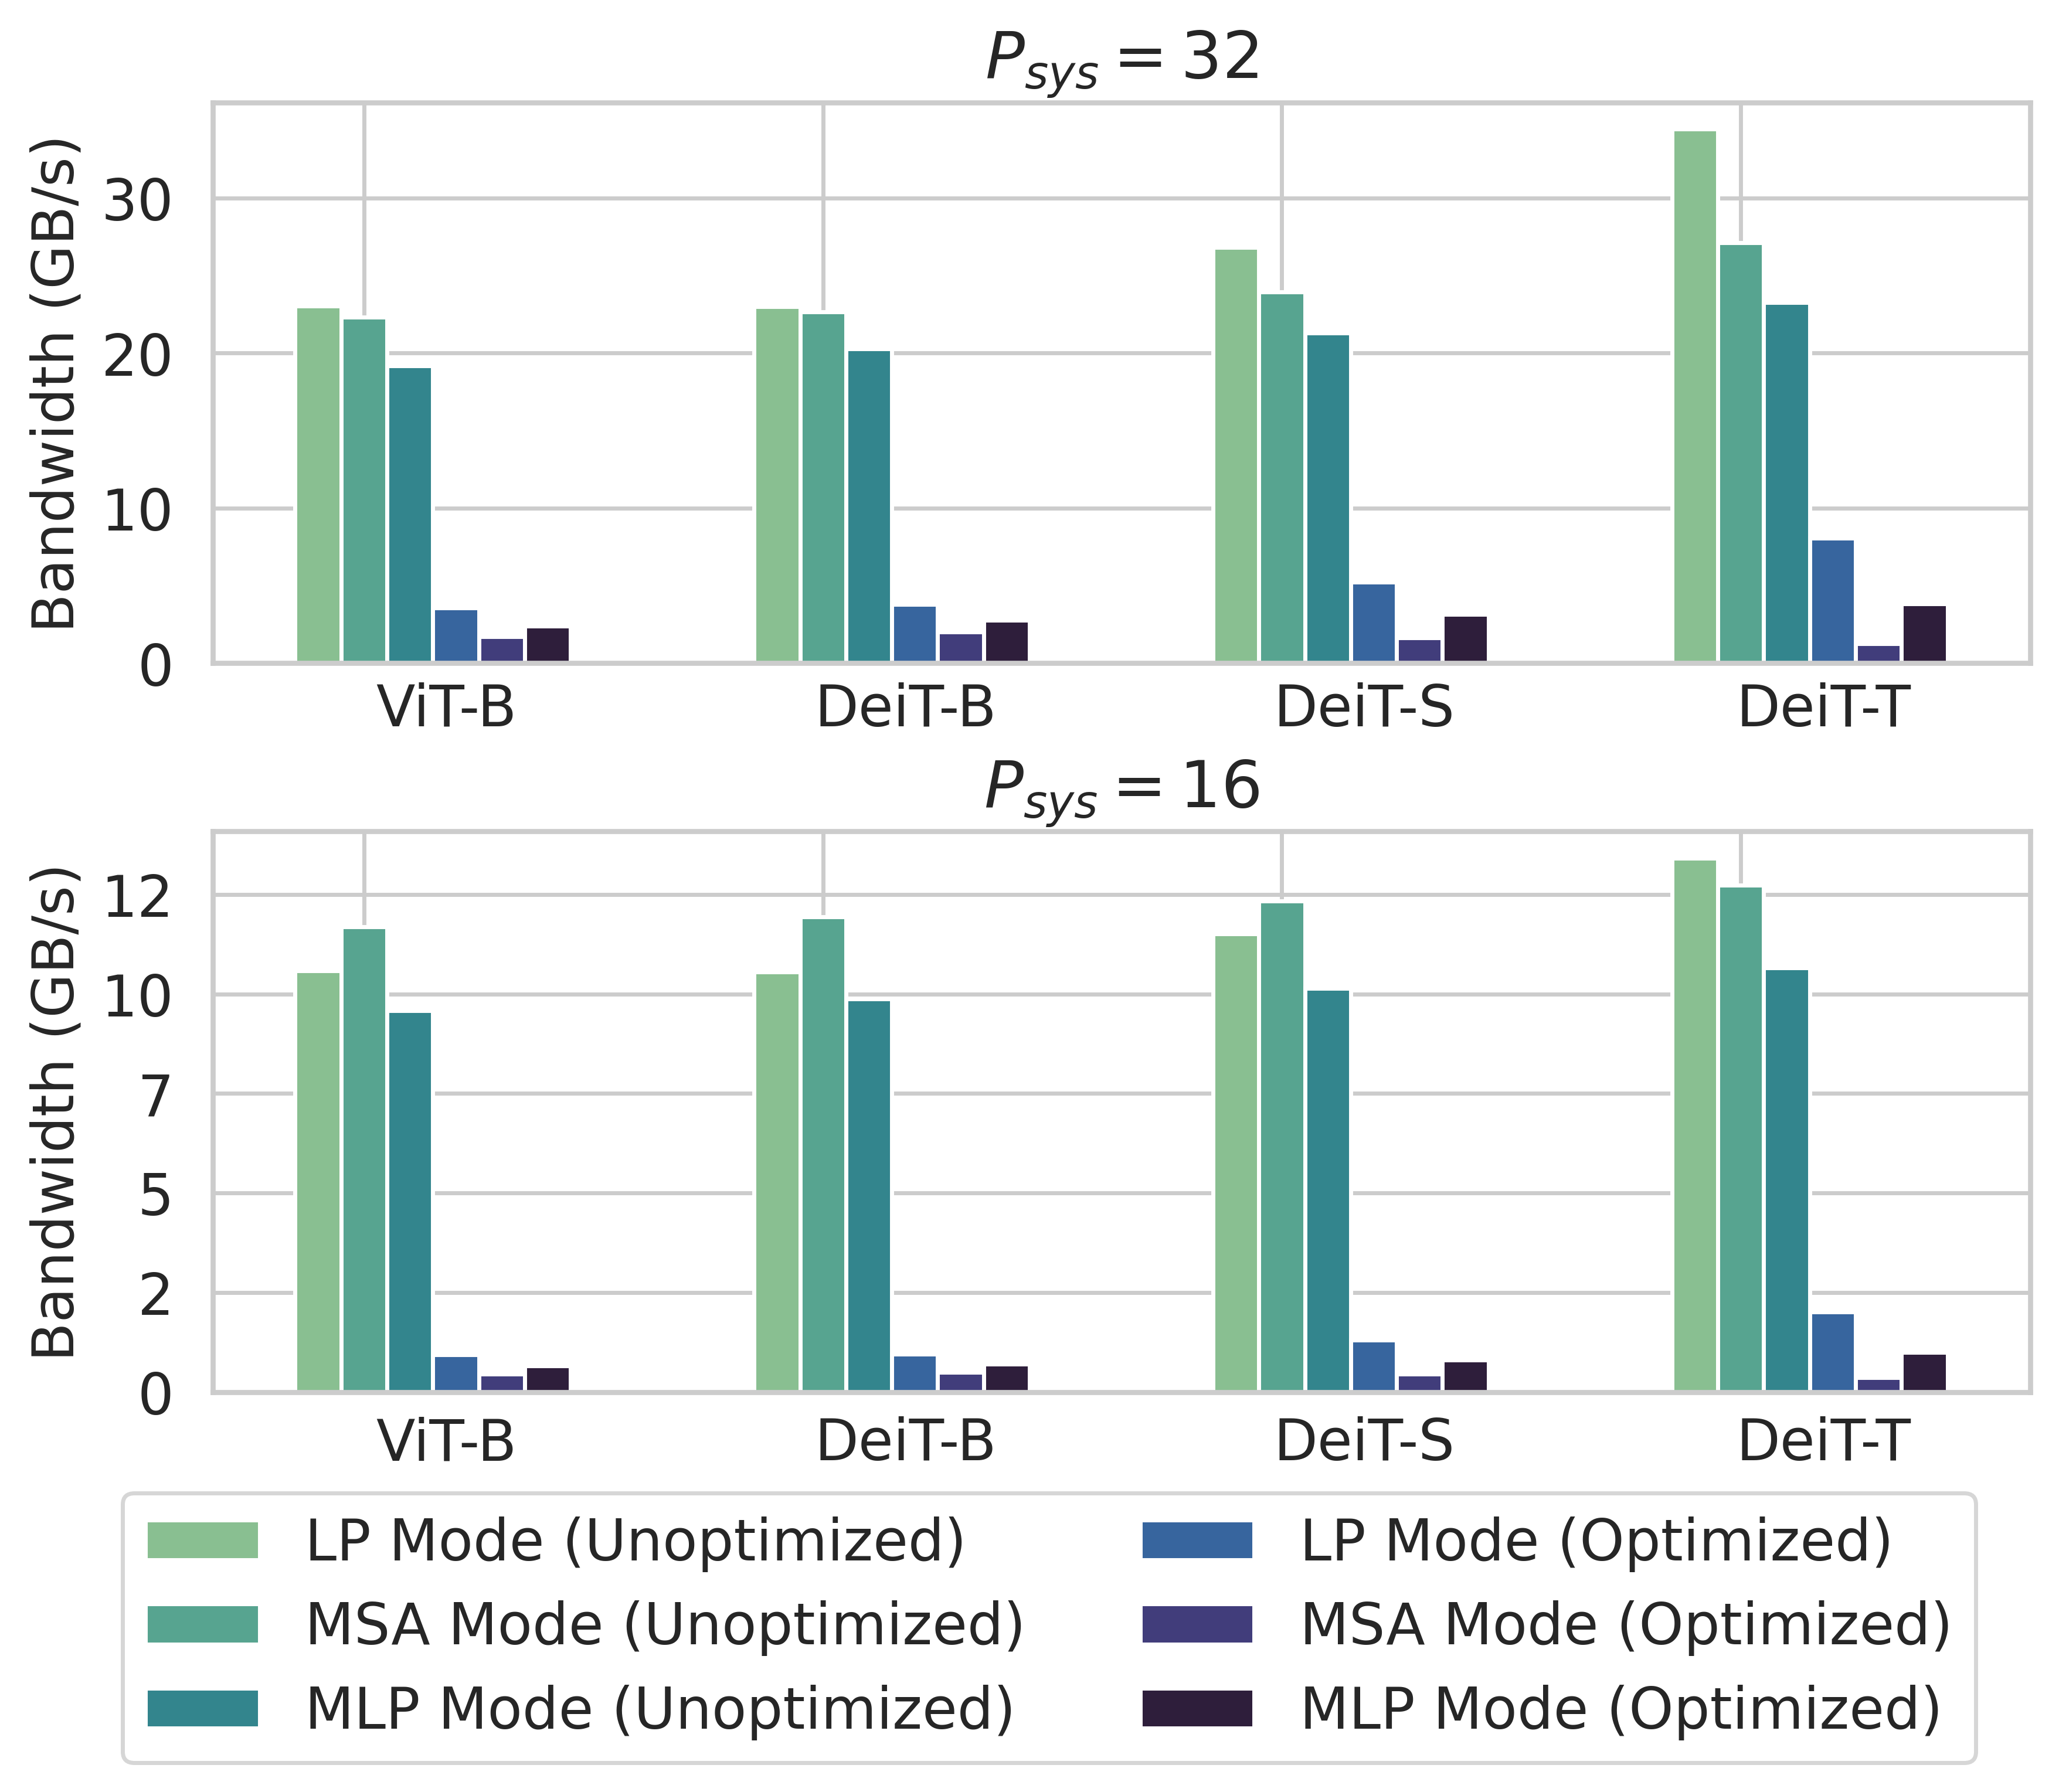

In [71]:


data = np.array([
    [23.03333333, 22.31336342, 19.18969957],
    [23.0125, 22.64838593, 20.27755102],
    [26.825, 23.96106825, 21.312],
    [34.45, 27.11299539, 23.26153846]
])

data_ideal = np.array([
    [3.566666667, 1.70607428, 2.391309013],
    [3.8125, 2.005658324, 2.781505102],
    [5.225, 1.640830861, 3.14775],
    [8.05, 1.274101382, 3.837980769]
])

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 5),dpi=500)

plt.subplots_adjust(bottom=0)


FONT_SIZE=14


sns.set()
sns.set_style("whitegrid")
colors = sns.color_palette("crest",9)
colors2 = sns.color_palette("mako_r")

#plt.rcParams['text.usetex'] = False
#plt.rcParams['mathtext.default'] = 'regular'


bar_width = 0.1
cluster_positions = np.arange(4)

labels = ["LP Mode (Unoptimized)", "MSA Mode (Unoptimized)", "MLP Mode (Unoptimized)"]
labels_2 = ["LP Mode (Optimized)", "MSA Mode (Optimized)", "MLP Mode (Optimized)"]

for i in range(3):
    bar_positions = cluster_positions + i * bar_width
    ax1.bar(bar_positions, data[:, i], bar_width, alpha=1, color=colors[i*2], label=labels[i])


for i in range(3):

    bar_positions = cluster_positions + (i+3) * bar_width
    ax1.bar(bar_positions, data_ideal[:, i], bar_width, alpha=1, label=labels_2[i],color=colors2[i+3])


ax1.set_ylabel('Bandwidth (GB/s)',fontsize=FONT_SIZE)
ax1.set_title('$P_{sys} = 32$', fontsize=16)

ax1.set_xticks(cluster_positions + bar_width)
ax1.set_xticklabels([],fontsize=FONT_SIZE)
tick_labels = ['ViT-B', 'DeiT-B', 'DeiT-S', 'DeiT-T']
ax1.set_yticklabels(ax1.get_yticks().astype('int'), fontsize=FONT_SIZE)  # Set the font size of y-axis tick labels


# We'll specify the font size for each x-axis tick label
for i in range(len(tick_labels)):
    if tick_labels[i] == 'ViT-B':
        ax1.text(cluster_positions[i] + bar_width+0.18, -3, tick_labels[i], ha='center', va='center', fontsize=FONT_SIZE)
    else:
        ax1.text(cluster_positions[i] + bar_width+0.18, -3, tick_labels[i], ha='center', va='center', fontsize=FONT_SIZE)

        
data = np.array([
    [10.57941176, 11.68606529, 9.587279152],
    [10.553125, 11.93151977, 9.872164948],
    [11.50625, 12.34012286, 10.13877551],
    [13.4125, 12.72571727, 10.656]
])

data_ideal = np.array([
    [0.9441176471, 0.4566803626, 0.6562720848],
    [0.953125, 0.5014145811, 0.7025451031],
    [1.30625, 0.4469447139, 0.802997449],
    [2.0125, 0.3605633803, 0.997875]
])
        


for i in range(3):
    bar_positions = cluster_positions + i * bar_width
    ax2.bar(bar_positions, data[:, i], bar_width, alpha=1, color=colors[i*2], label=labels[i])


for i in range(3):

    bar_positions = cluster_positions + (i+3) * bar_width
    ax2.bar(bar_positions, data_ideal[:, i], bar_width, alpha=1, label=labels_2[i],color=colors2[i+3])
    
ax2.set_title('$P_{sys} = 16$', fontsize=16)
ax2.set_ylabel('Bandwidth (GB/s)',fontsize=FONT_SIZE)


    
ax2.set_xticks(cluster_positions + bar_width)
ax2.set_xticklabels([],fontsize=FONT_SIZE)
tick_labels = ['ViT-B', 'DeiT-B', 'DeiT-S', 'DeiT-T']
ax2.set_yticklabels(ax2.get_yticks().astype('int'), fontsize=FONT_SIZE)

for i in range(len(tick_labels)):
    if tick_labels[i] == 'ViT-B':
        ax2.text(cluster_positions[i] + bar_width+0.18, -1.3, tick_labels[i], ha='center', va='center', fontsize=FONT_SIZE)
    else:
        ax2.text(cluster_positions[i] + bar_width+0.18, -1.3, tick_labels[i], ha='center', va='center', fontsize=FONT_SIZE)


legend = ax2.legend(fontsize=FONT_SIZE, bbox_to_anchor=(0.97, -0.18),borderaxespad=0., ncol=2)

#plt.subplots_adjust(right=0.8)  # Adjust the right margin
plt.subplots_adjust(hspace=0.3)
plt.show()


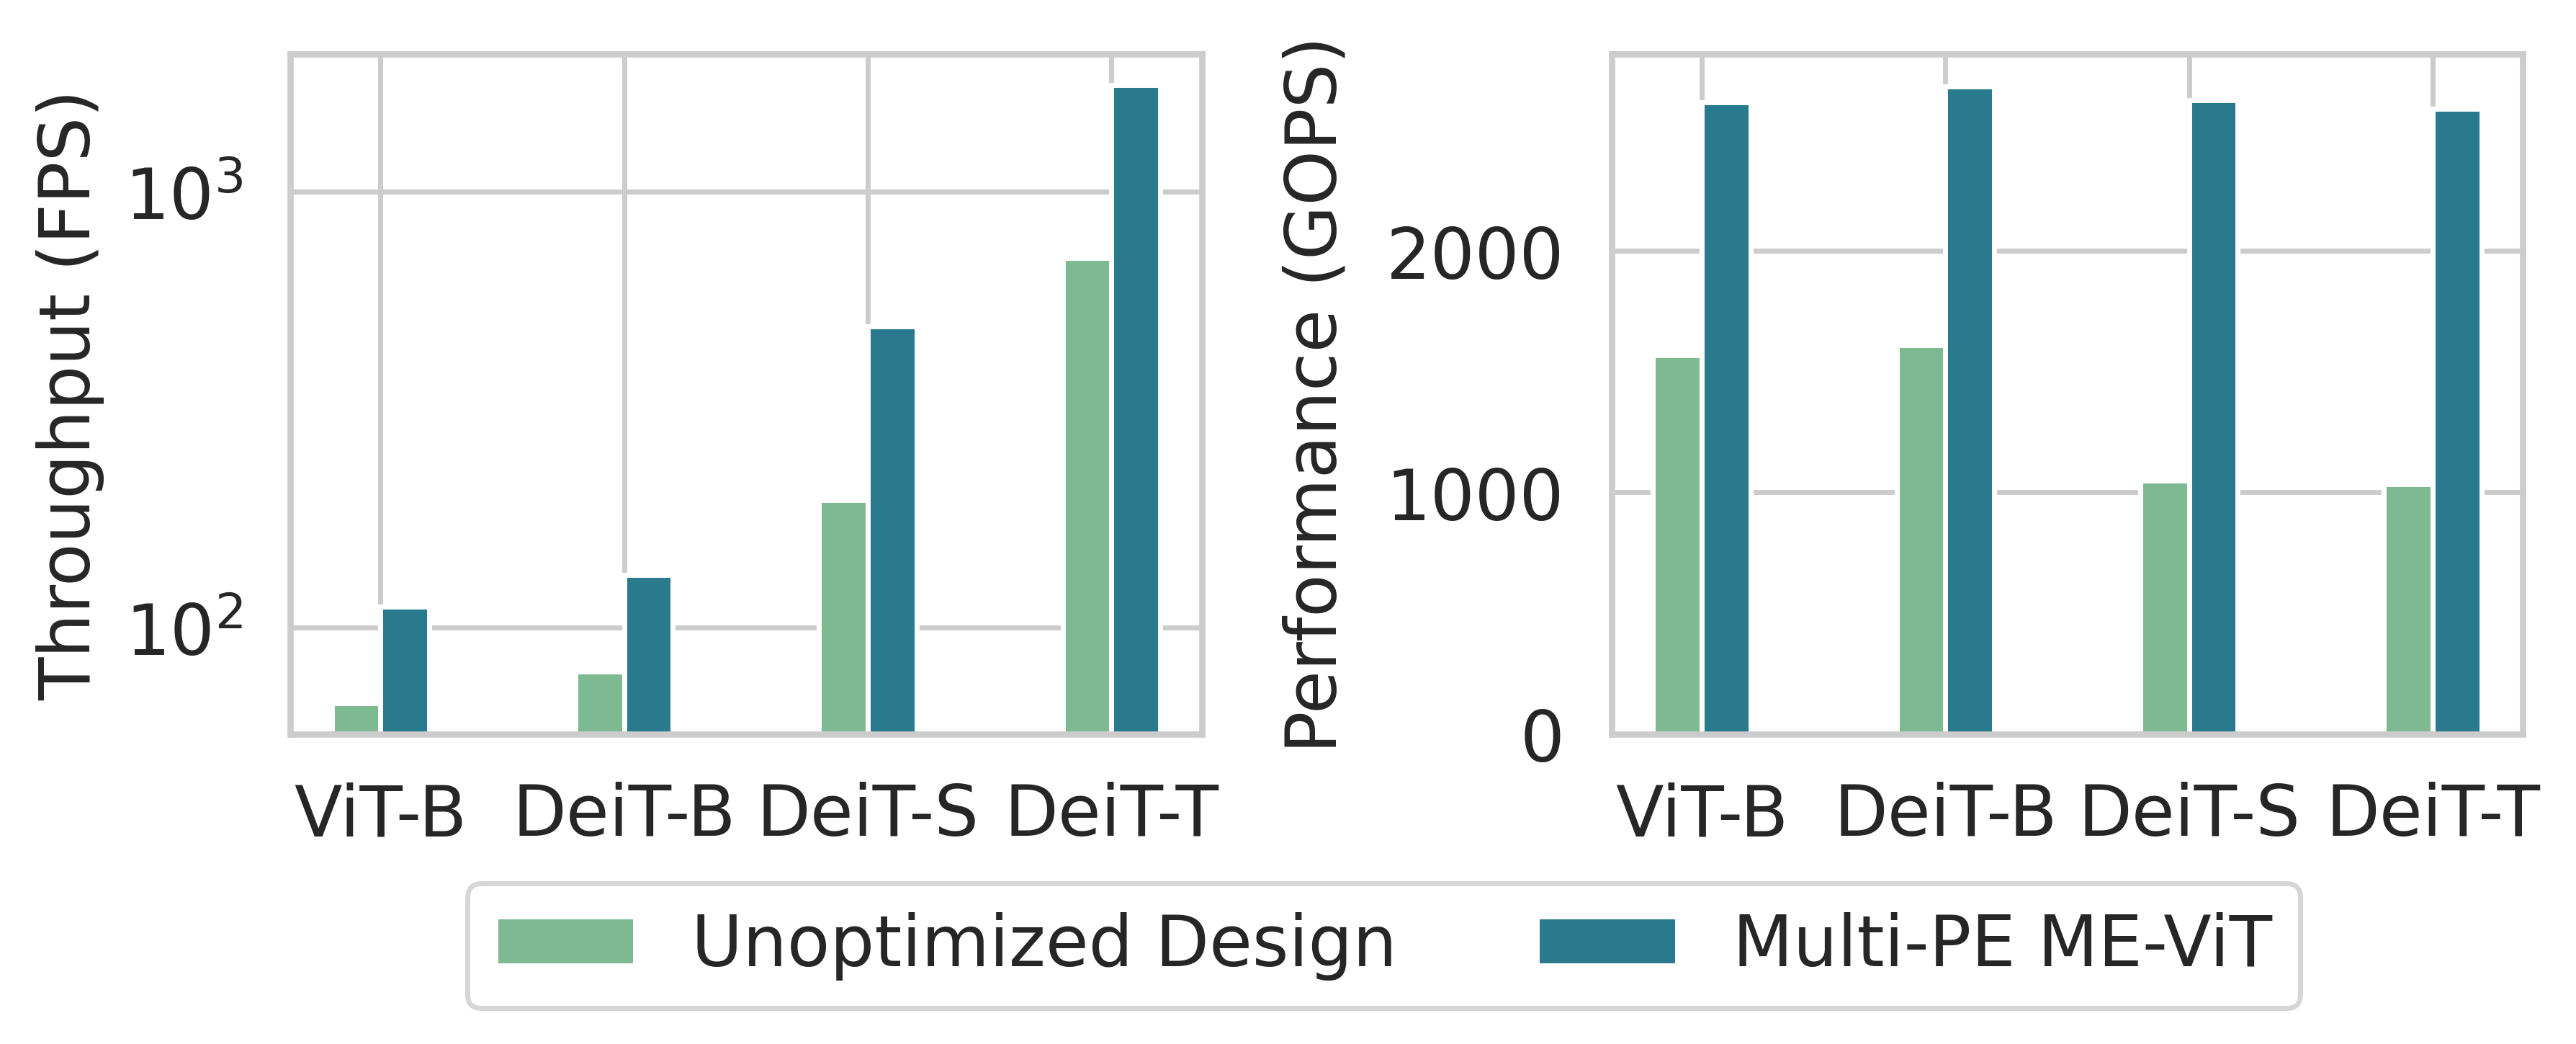

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

FONT_SIZE=14

data = np.array([
    [67.15736313, 111.9289386],
    [79.2262448, 132.0437413],
    [196.5038043, 491.2595108],
    [704.5428926, 1761.357231]
])

sns.set()
sns.set_style("whitegrid")
colors = sns.color_palette("crest")

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 2.5),dpi=500)

bar_width = 0.2
cluster_positions = np.arange(4)

labels  = ["Unoptimized Design", "Multi-PE ME-ViT"]

for i in range(2):
    bar_positions = cluster_positions + i * bar_width
    ax1.bar(bar_positions, data[:, i], bar_width, alpha=1, label=labels[i], color=colors[i*3])

ax1.set_ylabel('Throughput (FPS)', fontsize=FONT_SIZE)
ax1.set_yscale('log')

ax1.set_xticks(cluster_positions + bar_width / 2)
ax1.set_xticklabels(['ViT-B', 'DeiT-B', 'DeiT-S', 'DeiT-T'], fontsize=FONT_SIZE)
# ax.set_yticklabels([0, 100, 200, 400, 800, 1600], fontsize=FONT_SIZE)  # Adjust these values as needed

ax1.legend(fontsize=20)
ax1.tick_params(axis='y', labelsize=FONT_SIZE)


data = np.array([
    [1568.226551, 2613.710918],
    [1608.853747, 2681.422911],
    [1049.879563, 2624.698907],
    [1034.77363, 2586.934076]
])
  
for i in range(2):
    bar_positions = cluster_positions + i * bar_width
    ax2.bar(bar_positions, data[:, i], bar_width, alpha=1, color=colors[3*i], label=labels[i])
    
ax2.set_ylabel('Performance (GOPS)',fontsize=FONT_SIZE, labelpad=7)

ax2.set_xticks(cluster_positions + bar_width / 2)
ax2.set_xticklabels(['ViT-B', 'DeiT-B', 'DeiT-S', 'DeiT-T'], fontsize=FONT_SIZE)
ax2.tick_params(axis='y', labelsize=FONT_SIZE)


# ax2.set_xticks([])
# tick_labels = ['ViT-B', 'DeiT-B', 'DeiT-S', 'DeiT-T']
# ax2.set_yticklabels(ax2.get_yticks(), fontsize=FONT_SIZE)  # Set the font size of y-axis tick labels


# # We'll specify the font size for each x-axis tick label
# for i in range(len(tick_labels)):
#     if tick_labels[i] == 'ViT-B':
#         ax2.text(cluster_positions[i] + bar_width+0., -0.65, tick_labels[i], ha='center', va='center', fontsize=FONT_SIZE)
#     else:
#         ax2.text(cluster_positions[i] + bar_width+0., -0.65, tick_labels[i], ha='center', va='center', fontsize=FONT_SIZE)


        
# handles, labels = ax1.get_legend_handles_labels()
# print(handles, labels)

# #order = [1, 3, 5, 0, 2, 4]

# order = [0, 1]

# ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=FONT_SIZE, bbox_to_anchor=(2, -0.16),borderaxespad=0., ncol=2) 

legend = ax1.legend(fontsize=FONT_SIZE, bbox_to_anchor=(1.2, -0.22),loc='upper center', borderaxespad=0, ncol=2)
plt.subplots_adjust(wspace=0.45)
plt.show()


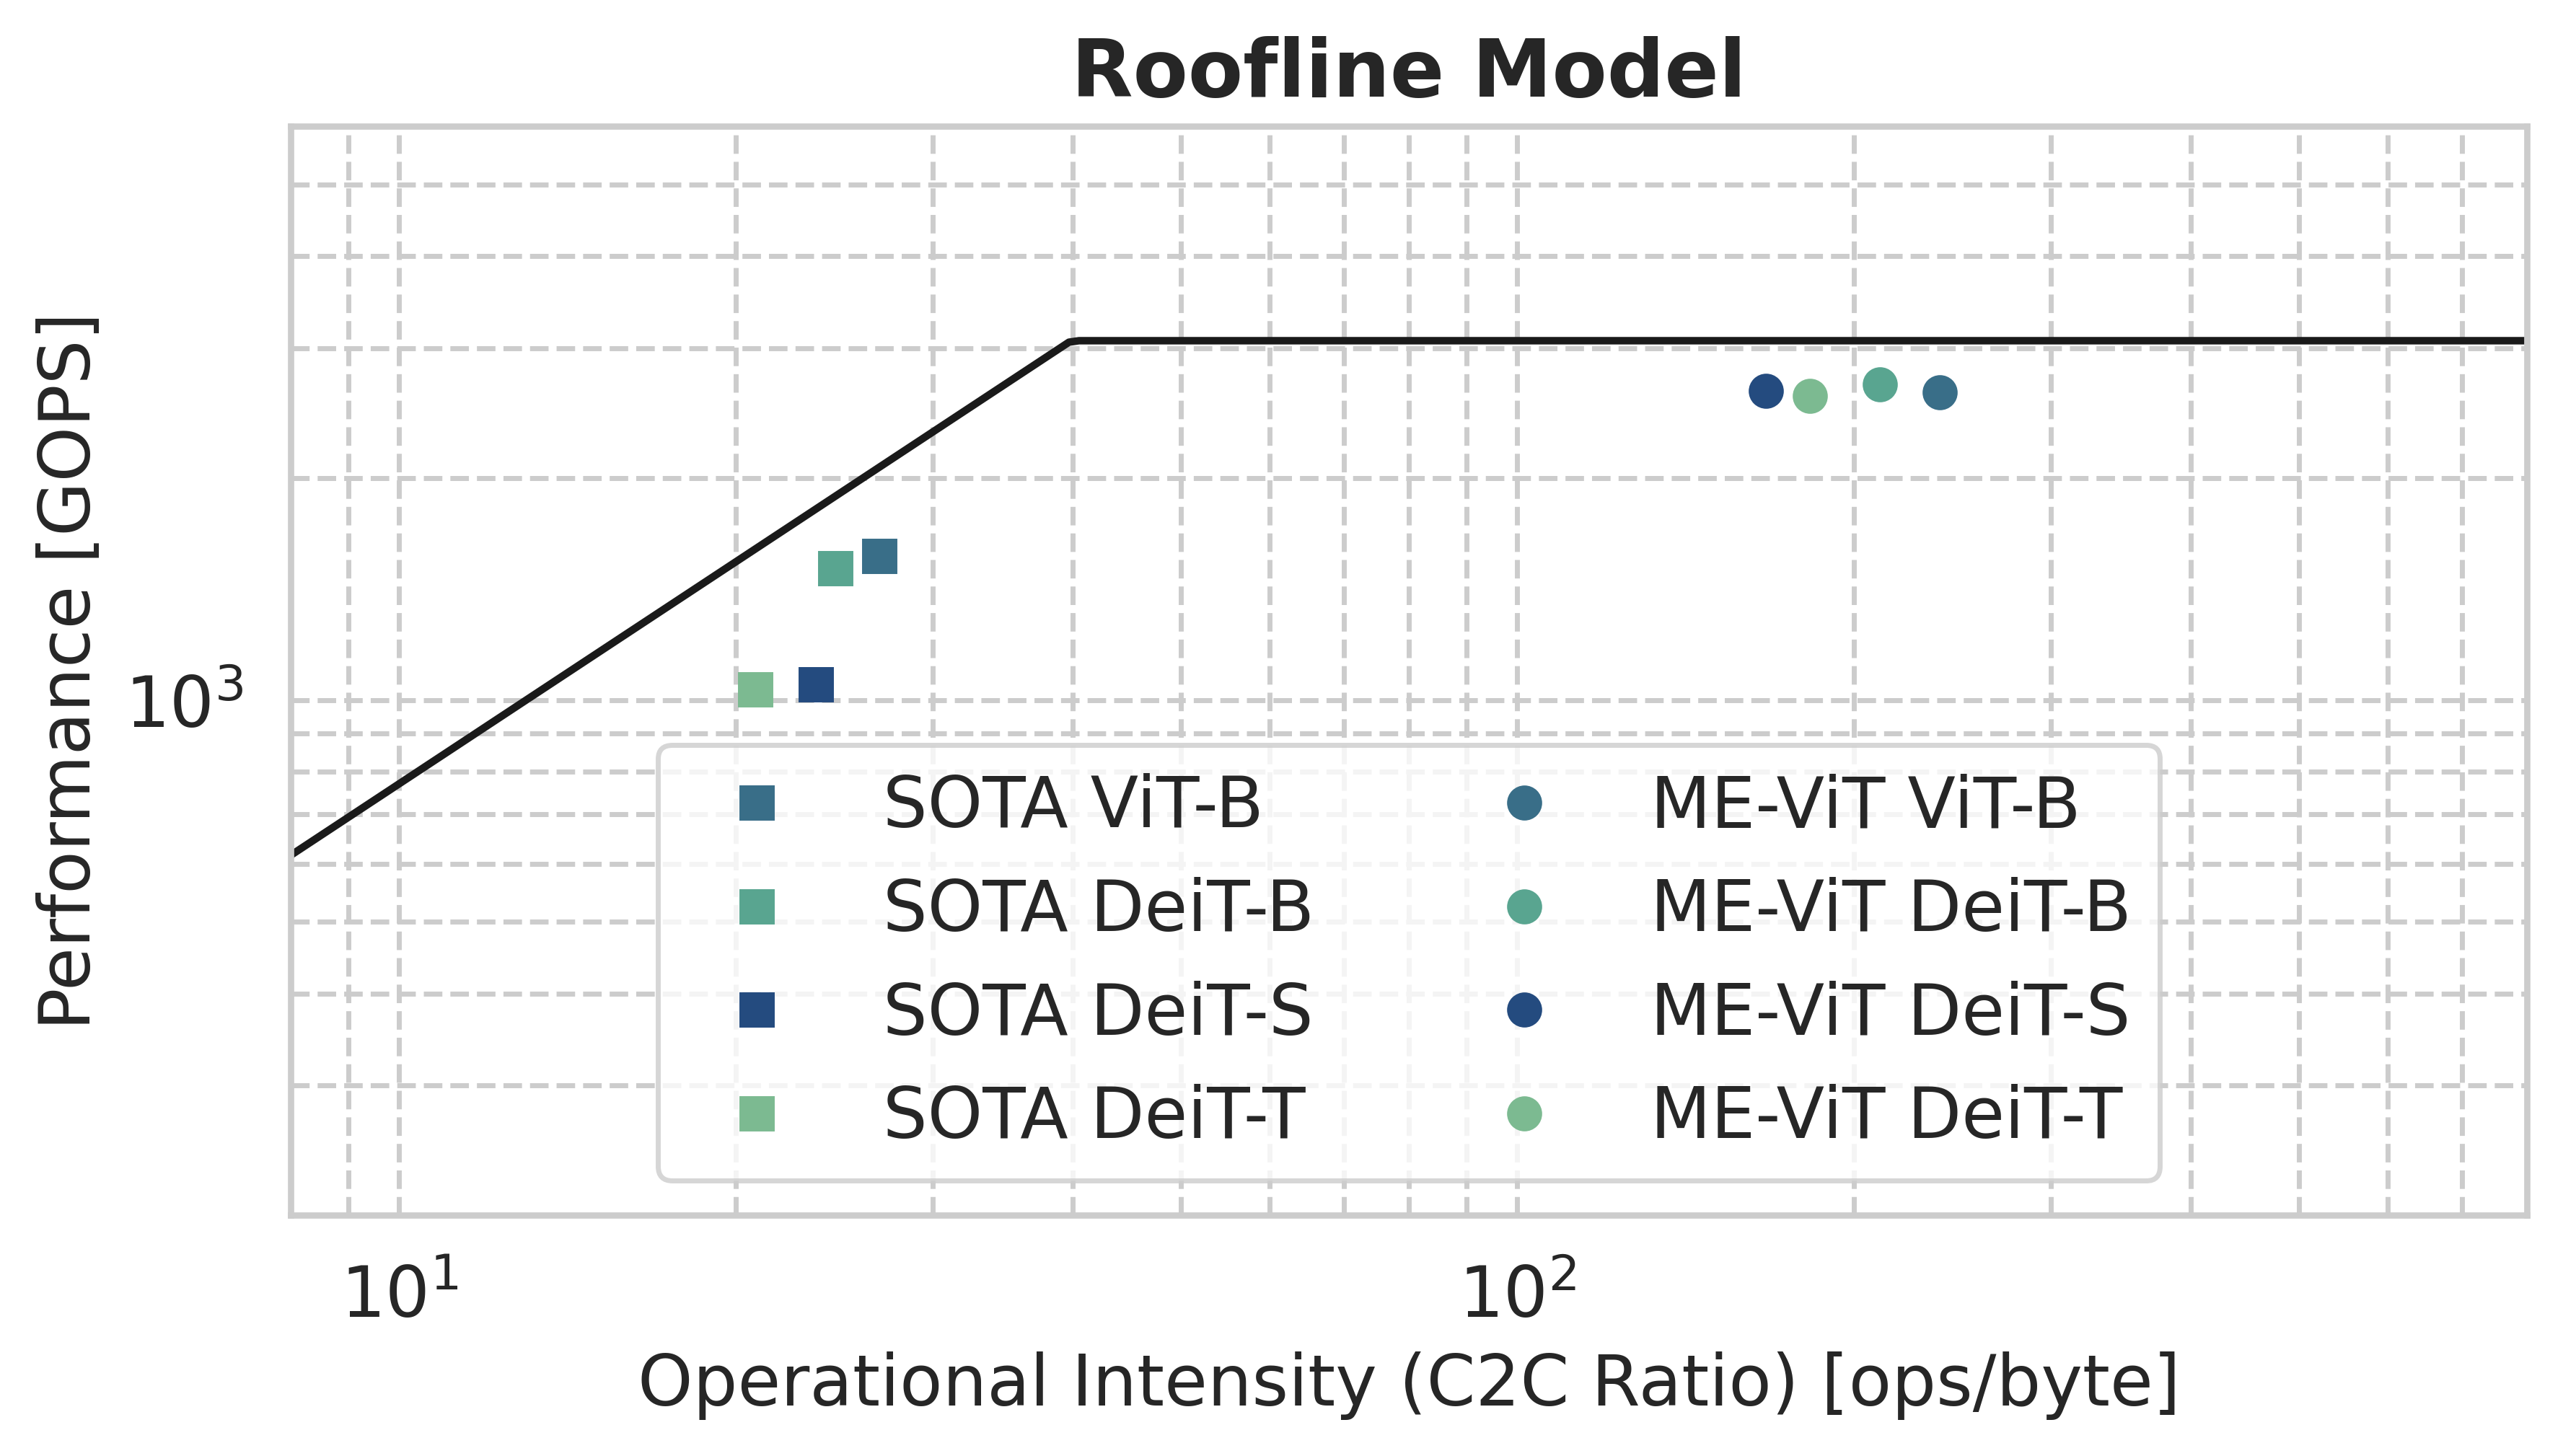

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ViT-B', 'DeiT-B', 'DeiT-S', 'DeiT-T']
unoptimized_ratio = [26.88536762, 24.54992128, 23.59376934, 20.81491375]
unoptimized_gops = [1568.226551, 1508.853747, 1049.879563, 1034.77363]
me_vit_ratio = [238.7713859, 210.9279929, 166.7666687, 182.6281827]
me_vit_gops = [2613.710918, 2681.422911, 2624.698907, 2586.934076]

# Colors for each model
colors = ['#396e88', '#59a590', '#244b7f', '#7cba91']

# Maximums
max_gops = 3072
max_bandwidth = 77  # GB/s

# Setting up the plot
fig, ax = plt.subplots(figsize=(8, 4), dpi=500)

# Plotting the roofline
x = np.logspace(np.log10(0.1), np.log10(max_gops), 500)
y1 = np.minimum(x * max_bandwidth, max_gops)
ax.loglog(x, y1, 'k-')

# Plotting the points for unoptimized
for model, ratio, gops, color in zip(models, unoptimized_ratio, unoptimized_gops, colors):
    ax.loglog(ratio, gops, marker='s', color=color, linestyle = 'None', label=f'SOTA {model}')

# Plotting the points for ME-ViT
for model, ratio, gops, color in zip(models, me_vit_ratio, me_vit_gops, colors):
    ax.loglog(ratio, gops, marker='o', color=color, linestyle = 'None', label=f'ME-ViT {model}')

# Configuring the plot
ax.grid(True, which="both", ls="--")
ax.set_xlabel('Operational Intensity (C2C Ratio) [ops/byte]', fontsize = 14)
ax.set_ylabel('Performance [GOPS]',  fontsize = 14)
ax.set_xlim([0.1, max_gops])
ax.set_ylim([0.1, max_gops])
ax.set_title('Roofline Model', weight='bold', fontsize=16)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.xlim([8, 800])
plt.ylim([200, 6000])


# Place a legend on the plot
ax.legend(ncol=2, loc='lower center', fontsize=14)

plt.show()